<h1 style="color:rgb(0,120,170)">Assignment 7: Second Order Methods</h1>
<h2 style="color:rgb(0,120,170)">Machine Learning: Theoretical Concepts, SS 2019</h2>

<h3 style="color:rgb(0,120,170)">Deadline: see Moodle</h3>
Return this notebook with your code and answers.

<h3 style="color:rgb(0,120,170)"> Task 7.1 (60 points) </h3>

Revisit logistic regression and apply Newton's method. 

Given input data $\{\mathbf{x}_i\}_{i \in \{1, \dots, n\}}, \mathbf{x}_i \in \mathbb{R}^k$ and labels 
$\{y_i\}_{i \in \{1, \dots n\}}, y_i \in \{0, 1\}$, minimize the cross-entropy loss
\begin{gather*}
  \mathcal{L}(\{\mathbf{x}_i\}; \mathbf{w}) = -\sum_{i=1}^n y_i \log \sigma(\mathbf{w}^\top\mathbf{x}_i) + (1-y_i) \log(1-\sigma(\mathbf{w}^\top\mathbf{x}_i))
\end{gather*}
where $\sigma: \mathbb{R} \to \mathbb{R}: \sigma(x) = (1+e^{-x})^{-1}$ is the logistic function. In a previous exercise, the gradient 
\begin{gather*}
  \mathbf{g} = \frac{\partial \mathcal{L}}{\partial \mathbf{w}} = -\sum_{i=1}^n (y_i - \sigma(\mathbf{w}^\top\mathbf{x}_i))\mathbf{x}_i
\end{gather*}
has already been determined. For this example, compute the Hessian
\begin{gather*}
  \mathbf{H} = \frac{\partial^2 \mathcal{L}}{\partial \mathbf{w}^2}
\end{gather*}
analytically and implement an optimization program that makes full-batch weight updates into the Newton direction 
$-\mathbf{H}^{-1}\mathbf{g}$. Apply your program to the data `data.csv`, which you must split into 
training (80%) and test set (20%). The last column comprises the 
labels which must be changed to ensure $y_i \in \{0, 1\}$. Choose the learning rate 
$\eta = 0.01$ and make 1000 weight updates for both Newton's method and gradient descent. 
Plot the learning curves and discuss the convergence behavior of the two methods. 

In the program, add a bias unit to your model. This does not change the math, because it can 
be interpreted as an additional constant input, i.e. the model output is of the form 
$\sigma(\mathbf{w}^\top\mathbf{x}_i + b) = \sigma(\mathbf{w}'^\top\mathbf{x}'_i)$, where $\mathbf{w}' = (w_1, \dots, w_k, b)^\top$ 
and $\mathbf{x}'_i = (x_{1_i}, \dots, x_{k_i}, 1)^\top$. 


* <span style="color:rgb(0,120,170)">**TODO:** Markdown & Code</span>

<h3 style="color:rgb(0,120,170)">Derivation of the Hessian:</h3>

According to $(9.183)$ in the lecture notes we know that 
\begin{align*}
\frac{\partial \mathcal{L}}{\partial \mathbf{w}_j} &= \frac{\partial}{\partial \mathbf{w}_j} -\sum_{i=1}^n y_i \log \sigma(\mathbf{w}^\top\mathbf{x}_i) + (1-y_i) \log(1-\sigma(\mathbf{w}^\top\mathbf{x}_i)) \\
&= -\sum_{i=1}^n x_{ij}(y_i - \sigma(\mathbf{w}^\top \mathbf{x_i}))
\end{align*}

From $(9.184)$ we can also infer that: 
\begin{align*}
\frac{\partial^2 \mathcal{L}}{\partial^2 \mathbf{w}_j} &= \frac{\partial}{\partial \mathbf{w}_j} -\sum_{i=1}^n x_{ij}(y_i - \sigma(\mathbf{w}^\top \mathbf{x_i})) \\
&= \frac{\partial}{\partial \mathbf{w}_j} -\sum_{i=1}^n x_{ij} y_i - x_{ij}\sigma(\mathbf{w}^\top \mathbf{x_i}) \\
&= \frac{\partial}{\partial \mathbf{w}_j} -\sum_{i=1}^n - x_{ij}\sigma(\mathbf{w}^\top \mathbf{x_i}) \\
&= \frac{\partial}{\partial \mathbf{w}_j} \sum_{i=1}^n x_{ij}\sigma(\mathbf{w}^\top \mathbf{x_i}) \\
&= \sum_{i=1}^n x_{ij} (\mathbf{w}^\top \mathbf{x_i})' \sigma(\mathbf{w}^\top \mathbf{x_i})(1 - \sigma(\mathbf{w}^\top \mathbf{x_i})) \\
&= \sum_{i=1}^n x_{ij}^2 \sigma(\mathbf{w}^\top \mathbf{x_i})(1 - \sigma(\mathbf{w}^\top \mathbf{x_i}))
\end{align*}

Also:
\begin{align*}
\frac{\partial^2 \mathcal{L}}{\partial \mathbf{w}_j \partial \mathbf{w}_k} &=\sum_{i=1}^n x_{ij} x_{ik} \sigma(\mathbf{w}^\top \mathbf{x_i})(1 - \sigma(\mathbf{w}^\top \mathbf{x_i}))
\end{align*}

Removing the sums gives us:

\begin{align*}
\frac{\partial^2 \mathcal{L}}{\partial^2 \mathbf{w}_j} &= z_j^\top \sigma(\mathbf{w}^\top \mathbf{x_i})(1 - \sigma(\mathbf{w}^\top \mathbf{x_i})) z_j \\
&= z_j^\top \beta z_j 
\end{align*}

and

\begin{align*}
\frac{\partial^2 \mathcal{L}}{\partial \mathbf{w}_j \partial \mathbf{w}_k} &= z_j^\top \sigma(\mathbf{w}^\top \mathbf{x_i})(1 - \sigma(\mathbf{w}^\top \mathbf{x_i})) z_k \\
&= z_j^\top \beta z_k 
\end{align*}

and 

\begin{align*}
\frac{\partial^2 \mathcal{L}}{\partial \mathbf{w}_k \partial \mathbf{w}_j} &= z_k^\top \sigma(\mathbf{w}^\top \mathbf{x_i})(1 - \sigma(\mathbf{w}^\top \mathbf{x_i})) z_j \\
&= z_k^\top \beta z_j 
\end{align*}

and finally

\begin{align*}
\frac{\partial^2 \mathcal{L}}{\partial^2 \mathbf{w}_k} &= z_k^\top \sigma(\mathbf{w}^\top \mathbf{x_i})(1 - \sigma(\mathbf{w}^\top \mathbf{x_i})) z_k \\
&= z_k^\top \beta z_k 
\end{align*}

with 

\begin{align*}
z_m &= (x_{1m}, \dots, x_{nm}) \\
\beta &= \sum_{i=1}^n \sigma(\mathbf{w}^\top \mathbf{x_i})(1 - \sigma(\mathbf{w}^\top \mathbf{x_i}))
\end{align*}

And finally we can write down the whole Hessian-Matrix:

\begin{align*}
H = \begin{pmatrix} z_1^\top \beta z_1^\top & z_1^\top \beta z_2^\top \newline
z_2^\top \beta z_1^\top & z_2^\top \beta z_2^\top \end{pmatrix}
\end{align*}

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import expit as sigmoid


def hessian(X, w, bias):
    w_bias = np.append(w, bias)
    X_bias = np.c_[X, np.ones(X.shape[0])]

    beta = calc_beta(X_bias, w_bias)
    return np.asarray([
        [hession_pos(X_bias, 0, 0, beta), hession_pos(X_bias, 0, 1, beta)],
        [hession_pos(X_bias, 1, 0, beta), hession_pos(X_bias, 1, 1, beta)]
    ])


def calc_beta(X, w):
    return np.sum([deriv_sigmoid(w.T @ x_i) for x_i in X], axis=0)


def hession_pos(X, j, i, beta):
    return (X[:, j].T * beta) @ X[:, i]


def deriv_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))


def dir_newton(H, g):
    return - (np.linalg.inv(H) @ g)


def logistic_gradient(X, y, w):
    s = np.zeros(X.shape[1])
    for i in range(X.shape[0]):
        s += X[i, :] * (y[i] - sigmoid(w.T @ X[i, :]))
    return -s


def ce_loss(X, y, w):
    return - sum([
        y_i * np.log(sigmoid(w.T @ x_i)) +
        (1 - y_i) * np.log(1 - sigmoid(w.T @ x_i)) for x_i, y_i in zip(X, y)
    ])


def newton_regression(X, y, max_iter=1000, bias=0.0, lr=0.01):
    w_old = np.random.rand(X.shape[1])
    losses = []

    for _ in range(max_iter):
        H = hessian(X, w_old, bias)
        g = logistic_gradient(X, y, w_old)
        w_new = w_old + lr * dir_newton(H, g)
        losses.append(ce_loss(X, y, w_new))

        w_old = w_new

    return w_old, losses


def logistic_regression(X, y, max_iter=1000, lr=0.01):
    w_old = np.random.rand(X.shape[1])
    losses = []

    for _ in range(max_iter):
        w_new = w_old - lr * logistic_gradient(X, y, w_old)
        losses.append(ce_loss(X, y, w_new))

        w_old = w_new

    return w_old, losses


def plot_results(losses, method):
    plt.figure(figsize=(16, 9))

    plt.plot(losses)
    plt.title(f'Loss {method} Regression')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')

    plt.show()

#### Reading the Data

In [2]:
from sklearn.model_selection import train_test_split


def labels_to_0_1(y):
    return (y + 1) / 2


data = np.loadtxt('data.csv', delimiter=',', skiprows=1)
data[:, -1] = labels_to_0_1(data[:, -1])

X_train, X_test, y_train, y_test = train_test_split(
    data[:, :-1], data[:, -1], test_size=0.2, shuffle=True)

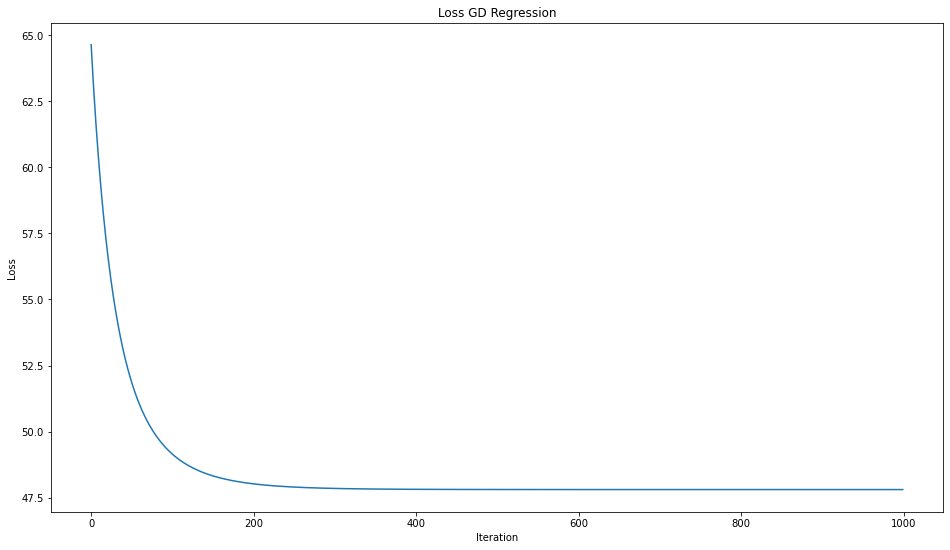

In [3]:
w_reg, losses_reg = logistic_regression(X_train, y_train)
plot_results(losses_reg, 'GD')

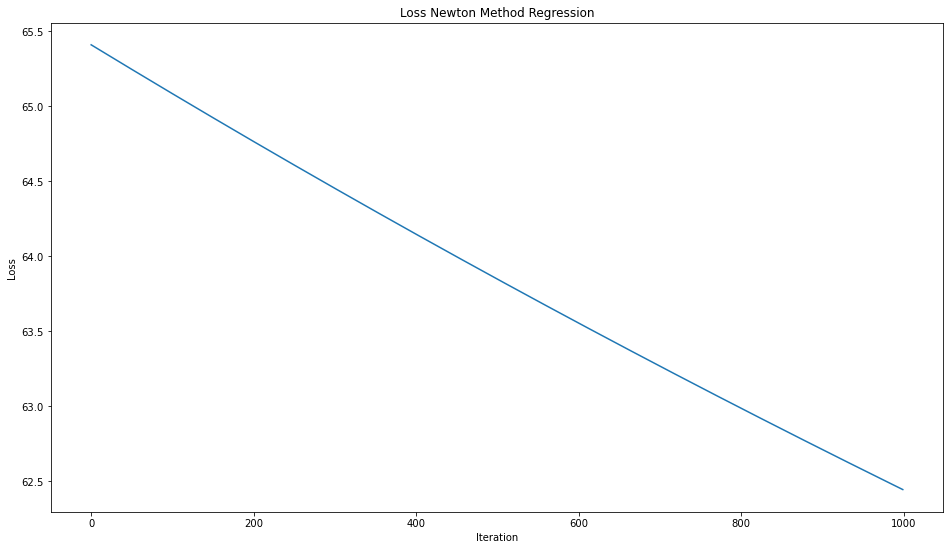

Bias: 0


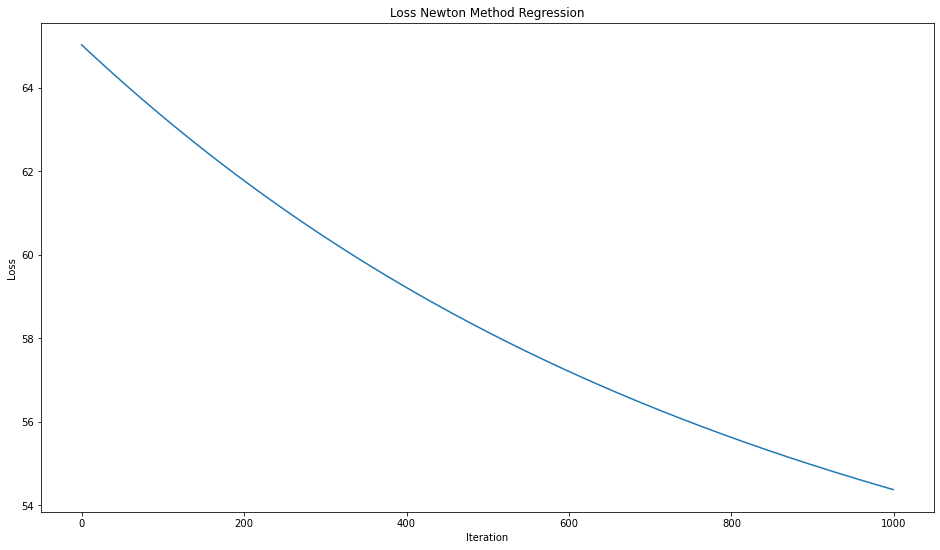

Bias: 3


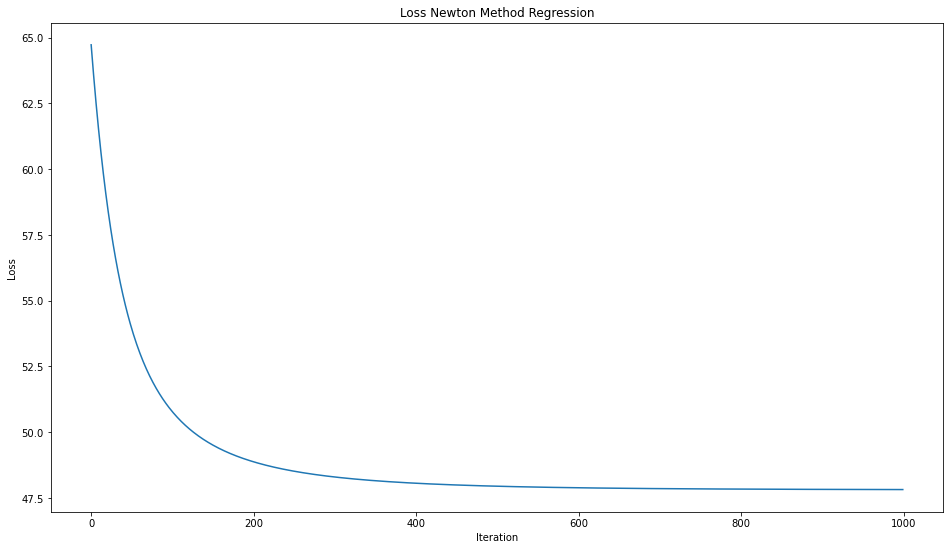

Bias: 6


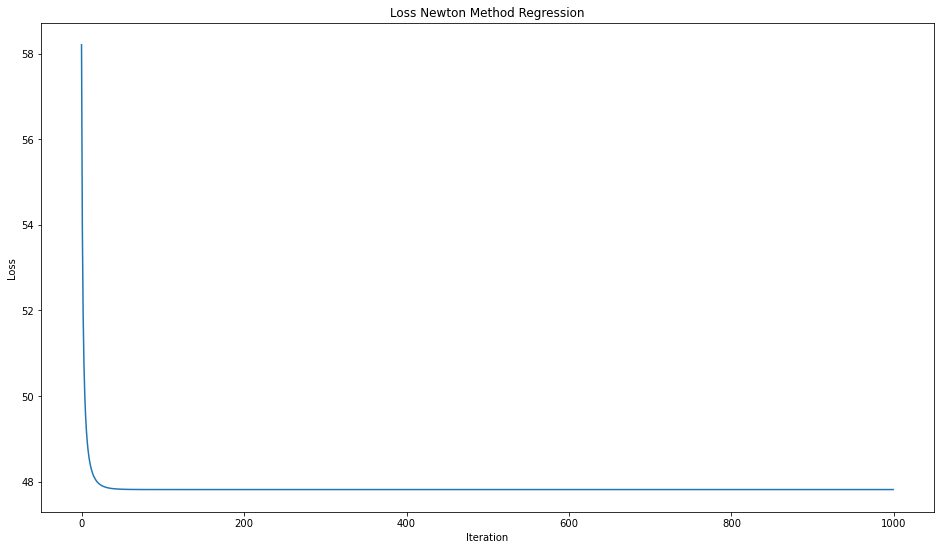

Bias: 9


In [4]:
for bias in range(0, 12, 3):
    w_newton, losses_newton = newton_regression(X_train, y_train, bias=bias)
    plot_results(losses_newton, 'Newton Method')
    print(f'Bias: {bias}')

We can observe that the gradient descent (*gd*) converges in around 200 to 300 iterations. Both curves resemble an exponential decrease. This might be due to the comparatively high learning rate of `0.01`. 

Surprisingly the Newton-Method (*nm*) (with `bias=0`) takes many thousands of iterations to converge. This was unexpected since in the lecture we have been told that it should converge more quickly. 

Literature [Deep Learning Cookbook (p. 276 last paragraph)](https://www.deeplearningbook.org/contents/optimization.html) suggests that Second Order Functions should be used with batchsizes of around `10.000`. However, in our example, we just use `96`. So this might be a reason for slow convergence. 

Also as can be seen in the plots above, the bias term seems to have a huge impact on the rate of convergence. 

<h3 style="color:rgb(0,120,170)"> Task 7.2 (40 points) </h3>

Apply the two second-order methods Broyden-Fletcher-Goldfarb-Shanno
(BFGS) and conjugate gradient (CG) to logistic resgression. Use the same data and test split as
before and apply full-batch learning.
Use Python's `scipy.optimize.minimize`. Again, plot the learning
curves. Then use `time.clock` or `time.perf_counter` to compare
the runtimes of both algorithms as well as for Gradient Descent (GD). 
Please document all your findings in detail, both in terms of obtained accuracy and in terms of runtime performance and interpret your results.

* <span style="color:rgb(0,120,170)">**TODO:** Code</span>

In [5]:
from sklearn.model_selection import train_test_split


def labels_to_0_1(y):
    return (y + 1) / 2


data = np.loadtxt('data.csv', delimiter=',', skiprows=1)
data[:, -1] = labels_to_0_1(data[:, -1])

X_train, X_test, y_train, y_test = train_test_split(
    data[:, :-1], data[:, -1], test_size=0.2, shuffle=True)

In [6]:
from time import perf_counter
from scipy.optimize import minimize


def perform_mini(X, y, method, max_iter=1000, lr=0.01):
    losses, w_result = [], None
    w_old = np.random.rand(X_train.shape[1])
    start = perf_counter()

    if method in ['BFGS', 'CG']:
        w_result = minimize(lambda w, X, y: ce_loss(X, y, w),
                            x0=w_old, args=(X, y), method=method,
                            options={'maxiter': max_iter},
                            callback=lambda w: losses.append(ce_loss(X, y, w))
                            ).x
    elif method == 'GD':
        for _ in range(max_iter):
            w_new = w_old - lr * logistic_gradient(X, y, w_old)
            losses.append(ce_loss(X, y, w_new))

            # terminate if convergence reached
            if np.allclose(w_new, w_old, atol=1e-4):
                break
            w_old = w_new

        w_result = w_old
    else:
        raise ValueError(f'Invalid Method passed: {method}')

    return w_old, losses, perf_counter() - start


def predict(X, w, clf=lambda x: x >= 0.5):
    return np.asarray([clf(w.T @ x_i) for x_i in X]).astype(int)


def accuracy(y_actual, y_pred):
    return np.sum(y_pred == y_actual) / len(y_actual)

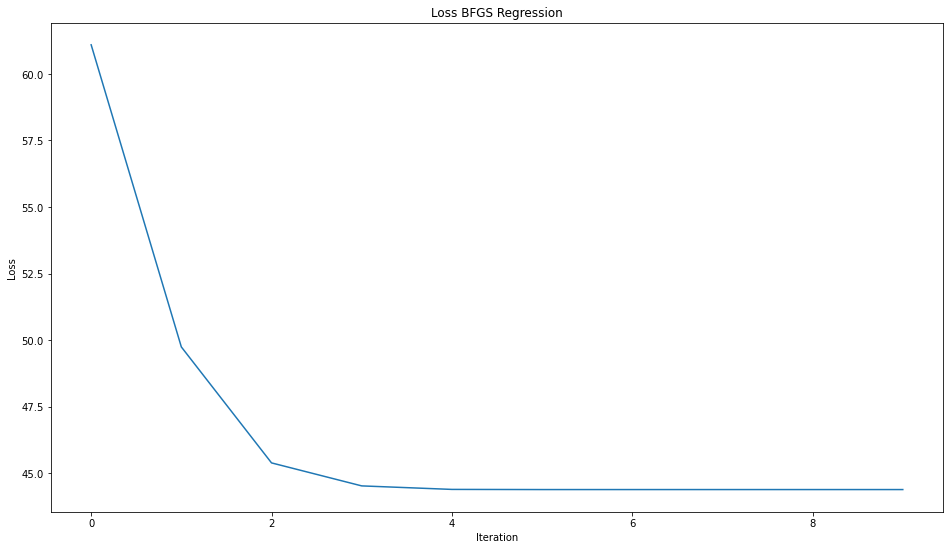

Optimal w found: [0.7038162  0.72973331]
Accuracy: 0.875
Time elapsed: 0.046266400000000374


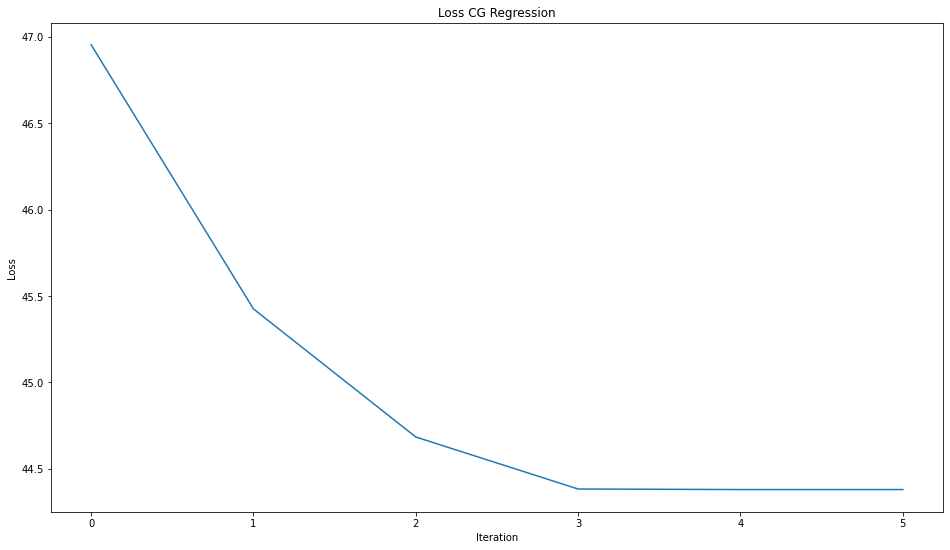

Optimal w found: [0.39183745 0.1380956 ]
Accuracy: 0.4583333333333333
Time elapsed: 0.048612199999999106


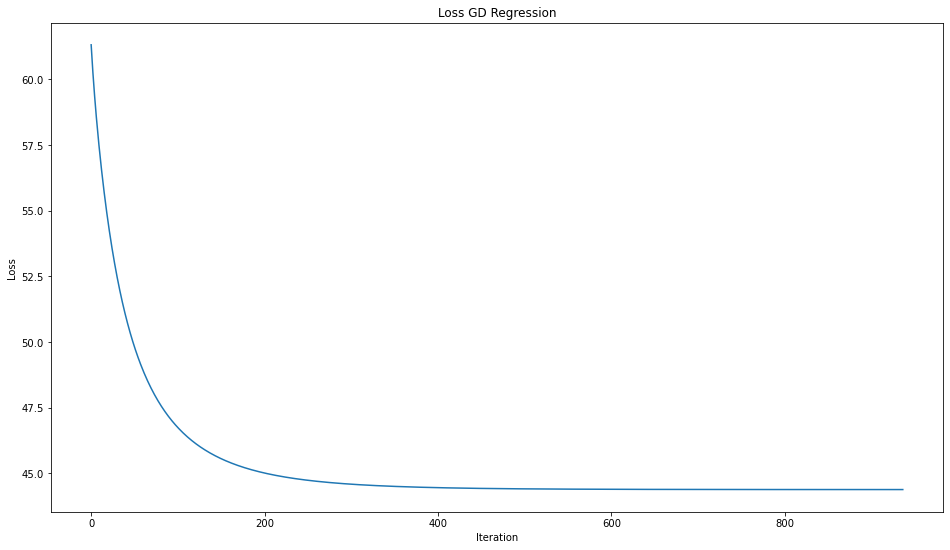

Optimal w found: [ 5.45498277 -4.41809547]
Accuracy: 0.8333333333333334
Time elapsed: 1.2916539999999994


In [7]:
w_bfgs, losses_bfgs, time_bfgs = perform_mini(X_train, y_train, 'BFGS')
w_cg, losses_cg, time_cg = perform_mini(X_train, y_train, 'CG')
w_gd, losses_gd, time_gd = perform_mini(X_train, y_train, 'GD')

plot_results(losses_bfgs, 'BFGS')
print(f'Optimal w found: {w_bfgs}')
print(f'Accuracy: {accuracy(y_test, predict(X_test, w_bfgs))}')
print(f'Time elapsed: {time_bfgs}')

plot_results(losses_cg, 'CG')
print(f'Optimal w found: {w_cg}')
print(f'Accuracy: {accuracy(y_test, predict(X_test, w_cg))}')
print(f'Time elapsed: {time_cg}')

plot_results(losses_gd, 'GD')
print(f'Optimal w found: {w_gd}')
print(f'Accuracy: {accuracy(y_test, predict(X_test, w_gd))}')
print(f'Time elapsed: {time_gd}')

<h3 style="color:rgb(0,120,170)">Discussion:</h3>

All reported results are not supposed to be taken at face value since the provided dataset only consisted of `120` data-points, `24` for validation. Therefore, there are huge fluctuations in terms of *accuracy* and smaller yet still noticeable fluctuations in the number of *iterations until convergence*, *cross entropy loss*. The "silhouette" of all algorithms remains roughly constant, however. 

Quite easily we can observe, that *BFGS* and *CG* outperform *GD* in terms of *iterations until convergence* and *runtime* as a consequence of that. *BFGS* is about almost twice as fast as *GD*, while *GD* needs around 50% more iterations until convergence. 

*GD* performs worse in terms of *iterations until convergence* and *runtime* by orders of magnitude. However, as a result of that *GD* has the "smoothest" curve, followed by *BFGS* and *CG*. Also, the early-stopping computation of *GD* (see comment) helps in speeding up the overall calculation.

Also, we can observe that all algorithms converge at around the same absolute value for the *cross entropy loss*. From this small toy-example, we could conclude that the main benefit of *BFGS* and *CG* over *GD* is their speed-up. 